## Observations and Insights 

In [ ]:
# Observations
# 1 - Capomulin showed a dramtic decrease in tumor volume over the course of the study
# 2 - Ramicane final tumor volume was similar to that of Capomulin but this data must be 
#     analyzed with respect to mouse weight (see 3 below) and change in tumor size over the course of the study.
# 3 - There is a strong correlation between mouse weight and average tumor volume. Therefore, analysis of data should
#     not be on absolute tumor volume but changes in volume over periods of time to adjust for impact of mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
combined_df = pd.merge(mouse_metadata_df,study_results_df,on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
combined_df['Mouse ID'].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Answer - See Next

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_row = combined_df[combined_df.duplicated()]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates()
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df['Mouse ID'].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_volume_df=clean_combined_df.iloc[:,[0,1,6]]
tumor_volume_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729


In [9]:
tumor_volume_df.groupby(['Drug Regimen']).describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  160.0  52.368318  6.502160  45.000000  47.107256   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.259803  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
# the course of the study using pandas. 
regimen_groups_df = clean_combined_df.groupby(['Drug Regimen'])
regimen_counts = regimen_groups_df['Mouse ID'].count().sort_values(ascending=False)
regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

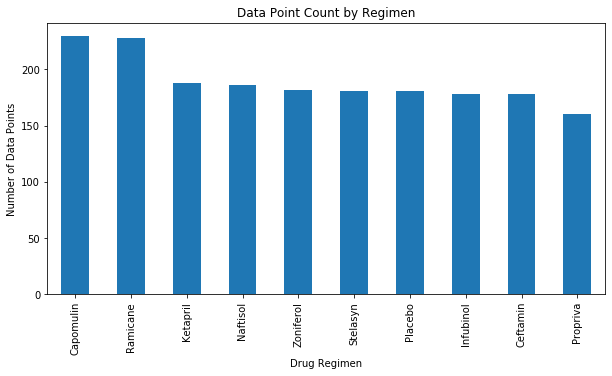

In [12]:
plt.figure(figsize=(10,5))
regimen_chart = regimen_counts.plot(kind="bar",title="Data Point Count by Regimen")
regimen_chart.set_ylabel("Number of Data Points")
plt.show


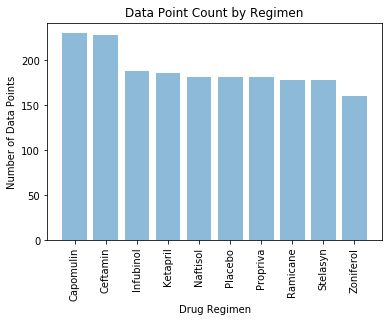

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
# the course of the study using pyplot.

objects = ('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
y_pos = np.arange(len(objects))
performance = regimen_counts

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Data Point Count by Regimen')
plt.xticks(rotation=90) 

plt.show()

## Pie Plots

In [14]:
# mice count time 0
time_zero_df = clean_combined_df.loc[combined_df['Timepoint']==0,:]
sex_groups= time_zero_df.groupby('Sex')
sex_count = sex_groups['Mouse ID'].count()
sex_count
time_zero_df.groupby(['Sex']).count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


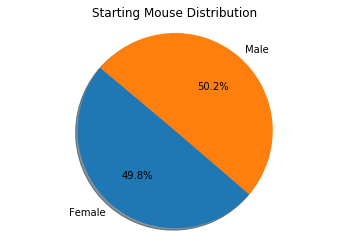

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_list = sex_count.keys()

mice_pie = sex_count.plot(kind="pie", y=gender_list, title=('Starting Mouse Distribution'),shadow=True, startangle=140,autopct='%1.1f%%')
mice_pie.set_ylabel("")
plt.axis("equal")
plt.show()
plt.tight_layout()

C:\Users\wsw22\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Starting Mouse Distribution')

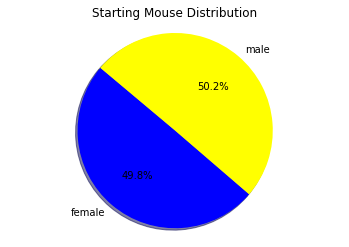

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['female','male']
sizes = [sex_count]
colors = ['blue','yellow']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.title('Starting Mouse Distribution')




## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.


In [18]:
last_recording_of_mouse_df=clean_combined_df.drop_duplicates(subset='Mouse ID', keep="last")
last_recording_of_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [19]:
capomulin_last_df = last_recording_of_mouse_df.loc[last_recording_of_mouse_df['Drug Regimen']=='Capomulin',:]
capomulin_last_tumorvolume = capomulin_last_df.loc[:,'Tumor Volume (mm3)']

quartiles_ca = capomulin_last_tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles_ca[0.25]
upperq = quartiles_ca[0.75]
iqr = upperq-lowerq
ca_lowerbound = lowerq -(1.5*iqr)
ca_upperbound = upperq +(1.5*iqr)

potential_outlier = capomulin_last_df.loc[(capomulin_last_df['Tumor Volume (mm3)']<ca_lowerbound) |
                                 (capomulin_last_df['Tumor Volume (mm3)']>ca_upperbound),:]
potential_outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [20]:
ramicane_last_df = last_recording_of_mouse_df.loc[last_recording_of_mouse_df['Drug Regimen']=='Ramicane',:]
ramicane_last_tumorvolume = ramicane_last_df.loc[:,'Tumor Volume (mm3)']

quartiles_ra = ramicane_last_tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles_ra[0.25]
upperq = quartiles_ra[0.75]
iqr = upperq-lowerq
ra_lowerbound = lowerq -(1.5*iqr)
ra_upperbound = upperq +(1.5*iqr)

potential_outlier = ramicane_last_df.loc[(ramicane_last_df['Tumor Volume (mm3)']<ca_lowerbound) |
                                 (ramicane_last_df['Tumor Volume (mm3)']>ca_upperbound),:]
potential_outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [21]:
infubinol_last_df =last_recording_of_mouse_df.loc[last_recording_of_mouse_df['Drug Regimen']=='Infubinol',:]
infubinol_last_tumorvolume = infubinol_last_df.loc[:,'Tumor Volume (mm3)']

quartiles_in = infubinol_last_tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles_in[0.25]
upperq = quartiles_in[0.75]
iqr = upperq-lowerq
in_lowerbound = lowerq -(1.5*iqr)
in_upperbound = upperq +(1.5*iqr)

potential_outlier = infubinol_last_df.loc[(infubinol_last_df['Tumor Volume (mm3)']<in_lowerbound) |
                                 (infubinol_last_df['Tumor Volume (mm3)']>in_upperbound),:]
potential_outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [22]:
ceftamin_last_df = last_recording_of_mouse_df.loc[last_recording_of_mouse_df['Drug Regimen']=='Ceftamin',:]
ceftamin_last_tumorvolume = ceftamin_last_df.loc[:,'Tumor Volume (mm3)']

quartiles_ce = ceftamin_last_tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles_ce[0.25]
upperq = quartiles_ce[0.75]
iqr = upperq-lowerq
ce_lowerbound = lowerq -(1.5*iqr)
ce_upperbound = lowerq +(1.5*iqr)

potential_outlier = ceftamin_last_df.loc[(ceftamin_last_df['Tumor Volume (mm3)']<in_lowerbound) |
                                 (ceftamin_last_df['Tumor Volume (mm3)']>in_upperbound),:]
potential_outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


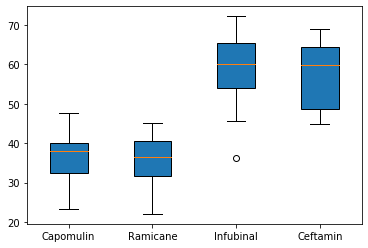

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data=[capomulin_last_tumorvolume,ramicane_last_tumorvolume, infubinol_last_tumorvolume,ceftamin_last_tumorvolume]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Capomulin',"Ramicane","Infubinal","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice_df = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Capomulin',:]
capomulin_s185_df = capomulin_mice_df.loc[capomulin_mice_df['Mouse ID']=='s185',:]
capomulin_s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


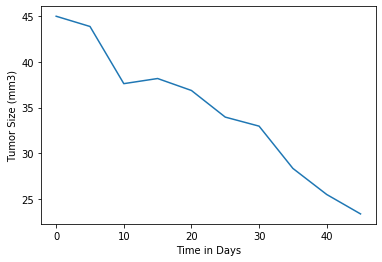

In [25]:
timepoint = capomulin_s185_df['Timepoint']
volume = capomulin_s185_df['Tumor Volume (mm3)']
plt.plot(timepoint,volume)
plt.xlabel("Time in Days")
plt.ylabel('Tumor Size (mm3)')
plt.show()

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_capomulin = capomulin_mice_df['Weight (g)']
grouped_tumor_volume_df=capomulin_mice_df.groupby(['Weight (g)','Mouse ID'], as_index = False).agg({'Tumor Volume (mm3)':'mean'})
grouped_tumor_volume_df.head()


,Weight (g),Mouse ID,Tumor Volume (mm3)
0,15,x401,36.182040
1,17,f966,36.505973
2,17,m601,34.847470
3,17,r554,36.509212
4,17,s185,34.559143


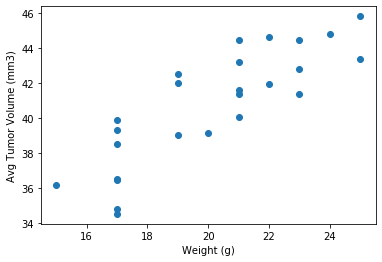

In [27]:
x_values = grouped_tumor_volume_df['Weight (g)']
y_values = grouped_tumor_volume_df['Tumor Volume (mm3)']
(slope, intercept, rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

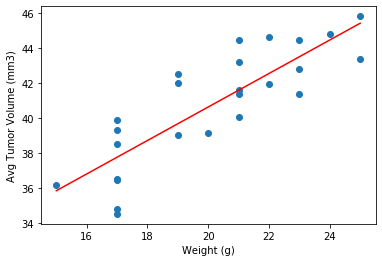

The correlation between both factors is 0.84


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = grouped_tumor_volume_df['Weight (g)']
y_values = grouped_tumor_volume_df['Tumor Volume (mm3)']
(slope, intercept, rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

correlation = st.pearsonr(grouped_tumor_volume_df['Weight (g)'],grouped_tumor_volume_df['Tumor Volume (mm3)'])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")
